Importing Dataset.

In [4]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Keith\AppData\Local\Temp\7zO8AA2B424\diabetic_data.csv')

Checking the column names and types for columns in dataset.

In [9]:
df.info()

Imports

In [150]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.datasets import make_regression 
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

Dropping unnecessary values from race and gender columns.
Removing columns that would not benefit our machine learning model.

In [151]:
df = df[df.race!='?']
df = df[df.gender!='Unknown/Invalid']
df.drop(columns = ['encounter_id','patient_nbr','weight', 'payer_code'], inplace=True)

In [152]:
df.drop(columns = ['medical_specialty', 'number_emergency'], inplace = True)

Creating dummy variables for categorical data in order to run machine learning model.

In [159]:
df.replace(to_replace=['Steady', 'Down', 'Up'], value='Yes', inplace=True)
df.insulin.value_counts()

df_breakout = pd.get_dummies(df, columns=["race","gender", "age", "admission_type_id", "discharge_disposition_id","admission_source_id",
                                         "diag_1", "diag_2", "diag_3", "max_glu_serum", "A1Cresult", "metformin", "repaglinide",
                                          "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide",
                                          "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton",
                                          "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone",
                                          "metformin-pioglitazone", "change", "diabetesMed"], drop_first=True)




In [160]:
X = df_breakout.drop(columns = ['readmitted'])
y = df['readmitted']
y.replace(to_replace=['>30', '<30'], value='YES', inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

Hyperparameter Tuning 

In [161]:
# clf = make_pipeline(StandardScaler(),SGDClassifier(loss = 'log', penalty = 'l1', max_iter = 1000, verbose = True, n_jobs = -1))
#SCORE = .5720...without yes/no
#SCORE = .6202 ... with yes/no

# clf = make_pipeline(StandardScaler(),SGDClassifier(loss = 'log', penalty = 'l1', max_iter = 1000, verbose = True, n_jobs = -1, n_iter_no_change = 1))
#score = 0.5709805813532747 w/o yes/no
# clf = make_pipeline(StandardScaler(),SGDClassifier(loss = 'log', penalty = 'l1', max_iter = 1000, verbose = True, n_jobs = -1, n_iter_no_change = 5))
#score = .572... w/o yes/no
# clf = make_pipeline(StandardScaler(),SGDClassifier(loss = 'log', penalty = 'l1', max_iter = 1000, verbose = True, n_jobs = -1, n_iter_no_change = 10))
#score = .5704... w/o yes/no
# clf = make_pipeline(StandardScaler(),SGDClassifier(loss = 'log', penalty = 'l1', max_iter = 1000, verbose = True, n_jobs = -1, n_iter_no_change = 5, alpha = 0.0001))
# Score = 0.5719856872914405... w/o yes/no
# clf = make_pipeline(StandardScaler(),SGDClassifier(loss = 'log', penalty = 'l1', max_iter = 1000, verbose = True, n_jobs = -1, n_iter_no_change = 5, alpha = 0.01))
# Score = 0.5621758533349415... w/o yes/no
# clf = make_pipeline(StandardScaler(),SGDClassifier(loss = 'log', penalty = 'l1', max_iter = 1000, verbose = True, n_jobs = -1, n_iter_no_change = 5, alpha = 1))
# Score = 0.5417118964338842

# clf = make_pipeline(StandardScaler(),SGDClassifier(loss = 'log', penalty = 'l1', max_iter = 1000, verbose = True, n_jobs = -1, n_iter_no_change = 5, alpha = 0.0001))
# score = 0.6206730189361959 with yes/no (best one yet)

Testing different variations of the data.

In [162]:

#FOR EXCEL SHEET
# clf = make_pipeline(StandardScaler(),SGDClassifier(verbose = True, n_jobs = -1))
# Score = 0.5435262576880618 (BASE CASE) w medication and medical specialty

# clf = make_pipeline(StandardScaler(),SGDClassifier(verbose = True, n_jobs = -1))
# Score = 0.5464559964620271 w medication... dropped medical specialty

# clf = make_pipeline(StandardScaler(),SGDClassifier(verbose = True, n_jobs = -1))
# Score = 0.5458127286616009 w/o medication and w/o medical specialty
# Score = w med  w/o medical specialty

# Score = 0.5500743778394243 w med  w/o medical specialty w/o number_emergency
# Score = 0.6022192739114702 w med w/o medical specialty w/o number_emergency w readmitted Y/N 
# Score = 0.6079282756402525 w med w/o medical specialty w/o number_emergency w readmitted Y/N w Medlist encoded


clf = make_pipeline(StandardScaler(),SGDClassifier(loss = 'log', penalty = 'l1', max_iter = 1000, verbose = True, n_jobs = -1, n_iter_no_change = 5, alpha = 0.0001))
# Score = 0.6323322478189202 w med w/o medical specialty w/o number_emergency w readmitted Y/N Medlist encoded  HYPERTUNED

In [165]:
clf.fit(X_train, y_train)

In [164]:
y_pred=clf.predict(X_test)
# y_pred
clf.score(X_test, y_test)


0.6323322478189202

In [45]:
predSeries = pd.Series(y_pred)

In [46]:
y_test = y_test.reset_index(drop = 'True')
ML_result = pd.concat([y_test, predSeries], axis=1)
ML_result.columns = ['True','Predicted']
ML_result.head(30)

,True,Predicted
0,YES,YES
1,NO,YES
2,NO,NO
3,YES,NO
4,NO,NO
5,YES,NO
6,NO,NO
7,YES,NO
8,NO,YES
9,NO,NO


In [47]:
# Pandas confusion matrix: 
confusion_matrix = pd.crosstab(ML_result['True'], ML_result['Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    NO   YES
Actual               
NO         9692  3782
YES        5663  5736


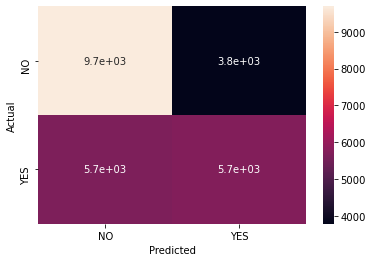

In [48]:
# Seaborn nice looking conf matrix: 
import seaborn as sn

import matplotlib.pyplot as plt
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [8]:
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn import linear_model
# from sklearn.datasets import make_regression 
# from sklearn import svm
# from sklearn.linear_model import SGDClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
# from sklearn import datasets
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import KFold
# from sklearn.metrics import accuracy_score

# df = df[df.race!='?']
# df = df[df.gender!='Unknown/Invalid']
# df.drop(columns = ['encounter_id','patient_nbr','weight', 'payer_code'], inplace=True)
# df.drop(columns = ['medical_specialty', 'number_emergency'], inplace = True)


# df.replace(to_replace=['Steady', 'Down', 'Up'], value='Yes', inplace=True)
# df.insulin.value_counts()

# df_breakout = pd.get_dummies(df, columns=["race","gender", "age", "admission_type_id", "discharge_disposition_id","admission_source_id",
#                                          "diag_1", "diag_2", "diag_3", "max_glu_serum", "A1Cresult", "metformin", "repaglinide",
#                                           "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide",
#                                           "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton",
#                                           "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone",
#                                           "metformin-pioglitazone", "change", "diabetesMed"], drop_first=True)

# X = df_breakout.drop(columns = ['readmitted'])
# y = df['readmitted']
# y.replace(to_replace=['>30', '<30'], value='YES', inplace=True)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

# clf = make_pipeline(StandardScaler(),SGDClassifier(loss = 'log', penalty = 'l1', max_iter = 1000, verbose = True, n_jobs = -1, n_iter_no_change = 5, alpha = 0.0001))

# clf.fit(X_train, y_train)

# y_pred=clf.predict(X_test)
# # y_pred
# clf.score(X_test, y_test)

# predSeries = pd.Series(y_pred)

# y_test = y_test.reset_index(drop = 'True')
# ML_result = pd.concat([y_test, predSeries], axis=1)
# ML_result.columns = ['True','Predicted']
# ML_result.head(30)

# confusion_matrix = pd.crosstab(ML_result['True'], ML_result['Predicted'], rownames=['Actual'], colnames=['Predicted'])
# print (confusion_matrix)

In [153]:
# df.info()

In [154]:
# df['glimepiride-pioglitazone'].value_counts()

In [155]:
# df.drop(columns = ['examide','citoglipton','metformin-rosiglitazone','metformin-pioglitazone', 'miglitol', 'troglitazone', 'tolazamide', 'glipizide-metformin', 'chlorpropamide', 'glimepiride-pioglitazone'], inplace = True)

In [6]:
# df

In [157]:
# df_breakout = pd.get_dummies(df, columns=["race","gender", "age", "diag_1", "diag_2", "diag_3", "max_glu_serum", "A1Cresult", "metformin", "repaglinide",
#                                           "nateglinide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide",
#                                           "pioglitazone", "rosiglitazone", "acarbose", 
#                                           "insulin", "glyburide-metformin",
#                                           "change", "diabetesMed"], drop_first=True)


In [7]:
# df.columns